In [1]:
import numpy as np
import tensorflow as tf
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [2]:
# Create a 1D Gaussian kernel
def gaussian_kernel1d_torch(sigma, kernel_size):
    x = torch.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    kernel = torch.exp(-0.5 * (x / sigma) ** 2)
    kernel = kernel / kernel.sum()  # Normalize the kernel
    return kernel.view(1, 1, -1)  # Reshape to [out_channels, in_channels, kernel_size]

# Function to apply Gaussian filter to 1D data
def gaussian_filter1d_torch(data, sigma, kernel_size):
    kernel = gaussian_kernel1d_torch(sigma, kernel_size)
    data = data.view(1, 1, -1)  # Reshape to [batch_size, in_channels, length]
    smoothed_data = F.conv1d(data, kernel, padding='same')
    return smoothed_data.view(-1)  # Return the smoothed data

# Create a 1D Gaussian kernel
def gaussian_kernel1d_tf(sigma, kernel_size):
    x = torch.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    # x = tf.range(-(kernel_size // 2), kernel_size // 2 + 1, dtype=tf.float32)
    kernel = tf.exp(-0.5 * (x / sigma) ** 2)
    kernel = kernel / tf.reduce_sum(kernel)  # Normalize the kernel
    return tf.reshape(kernel, [kernel_size, 1, 1])  # Reshape to [kernel_size, in_channels, out_channels]

# Function to apply Gaussian filter to 1D data
def gaussian_filter1d_tf(data, sigma, kernel_size):
    kernel = gaussian_kernel1d_tf(sigma, kernel_size)
    data = tf.cast(data, dtype=tf.float32)  # Ensure the input is float32
    data = tf.reshape(data, [1, -1, 1])  # Reshape to [batch_size, length, channels]
    smoothed_data = tf.nn.conv1d(data, kernel, stride=1, padding='SAME')
    return tf.reshape(smoothed_data, [-1])  # Return the smoothed data

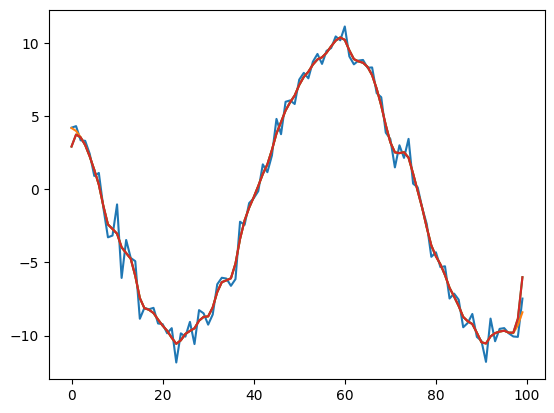

In [13]:
sigma = 1
x = 10 * np.cos(np.linspace(1, 10, 100)) + np.random.randn(1, 100)
y_np = gaussian_filter1d(x, sigma, truncate=5, radius=7)
y_pt = gaussian_filter1d_torch(torch.from_numpy(x).to(torch.float32), sigma=sigma, kernel_size=7)
y_tf = gaussian_filter1d_tf(x, sigma=sigma, kernel_size=7)


plt.plot(np.squeeze(x))
plt.plot(np.squeeze(y_np))
plt.plot(np.squeeze(y_pt))
plt.plot(np.squeeze(y_tf))